# Dense coding

@Author: Javier Mas

The purpose is to send 2-classical bits by exchangin a single quantum qubit. The key is for Alice and Bob to share an entangle 2-qubit state.  So, initially, Alice has qubit 0 and Bob qubit 1. 

In [1]:
%matplotlib inline
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import qiskit.tools.jupyter
%qiskit_version_table

## Create a circuit with quantum register of 2 qubits and classical register of 2 bits

In [2]:
circuit=QuantumCircuit(2,2)

# Create the entangled state, concretely 

$$|B00>=\frac{1}{\sqrt{2}}(|00>+|11>)$$

In [3]:
circuit.h(0)
circuit.cx(0,1)

## Alice performs an operation on q0 depending on the 2-bit sequence she wants to send, according to the following rule

* 00, I
* 01, X
* 10, Y
* 11, Z

## For example, let's assume Alice wants to send 01. Then apply she applies X to her qubit

In [4]:
circuit.x(0)

## now Alice sends her qubit to Bob. When Bob receives the qubits, he first disentangles the 2 qubit-state.

In [5]:
circuit.cx(0,1)
circuit.h(0)

## Finally Bob measures the two qubits onto the two classical bits


In [6]:
circuit.measure((0,1),(0,1))

In [7]:
## You can see the final version of your circuit graphically. The qubit 0 is on the top of the circuit. 

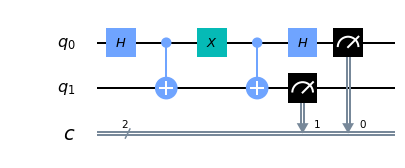

In [8]:
circuit.draw(output='mpl')


### Run the simulation 

in order to run the simulation we must use the Aer component of qiskit

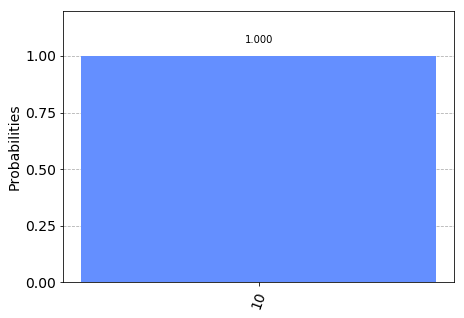

In [9]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator).result()

# to see the result plot the histogram
plot_histogram(result.get_counts(circuit))

### Run remotely on IBM's QC

in order to send the program to the IBM computer, we must load the account

In [10]:
IBMQ.load_account()
providerhere=IBMQ.get_provider('ibm-q')



To see the available QPUs, you can get the list from IBM service

In [11]:
providerhere.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

To select the most appropiate QPU for your circuit (or the QPU with smallest queue), you can also connect to <a href="https://quantum-computing.ibm.com/">IBM Quantum Computing</a>

Or you can compare directly

In [12]:
%qiskit_backend_overview

/home/agomez/fakeconda/cursoIGFAE/lib/python3.5/site-packages/qiskit/providers/models/backendconfiguration.py:367: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


In [13]:
qcomphere=providerhere.get_backend('ibmqx2')

In [14]:
qcomphere

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

finally declare the job

In [15]:
jobhere=execute(circuit,backend=qcomphere)

and monitor de execution

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(jobhere)

Job Status: job is queued (5)

Finally, let us plot the result

In [ ]:
qresult = jobhere.result()

plot_histogram(qresult.get_counts(circuit))